# Задание 1

Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

### Решение

In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании 
    # прибавляются с шагом eta
    return np.array([sum([
        eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) 
                     for x in X])

In [5]:
# Функционал ошибки (среднеквадратичная ошибка)
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
###########
def bias(z, y):
    return 2 * (z - y)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
    return trees, train_errors, test_errors

In [8]:
%%time
# Число деревьев в ансамбле
n_trees = 10
n_trees_list = [3, 5, 10, 20]

# Максимальная глубина деревьев
max_depth = 3
max_depth_list = [3, 5, 10, 20]

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

#Шаг
eta = 0.5

#trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
results_n_trees = [gb_fit(trees, max_depth, X_train, X_test, y_train, y_test, [1]*trees, eta) for trees in n_trees_list]
results_max_depth = [gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, coefs, eta) for depth in max_depth_list]


Wall time: 20.4 s


In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {round(mean_squared_error(y_train, train_prediction))}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {round(mean_squared_error(y_test, test_prediction))}')

In [10]:
#evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

In [11]:
def get_error_plot(n_trees, train_err, test_err):
    plt.figure(figsize=(8, 6))
    plt.grid(axis='y')
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [12]:
#get_error_plot(n_trees, train_errors, test_errors)

#### Построим графики зависимости ошибок на train и test от количества деревьев (макс. глубина дерева = 3) ####

Количество деревьев: 3


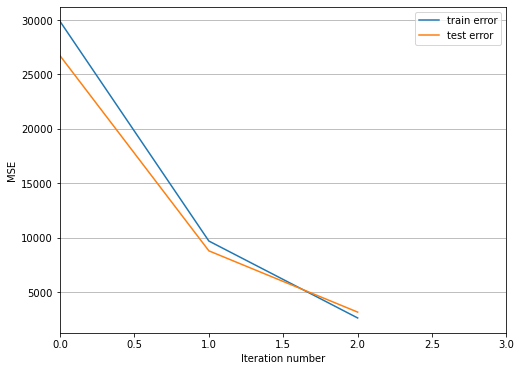

Количество деревьев: 5


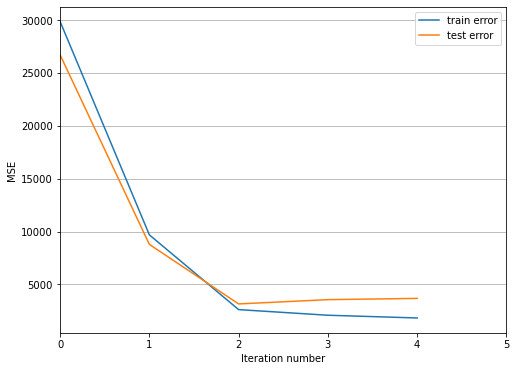

Количество деревьев: 10


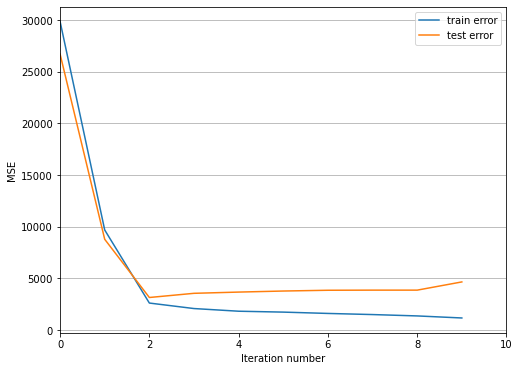

Количество деревьев: 20


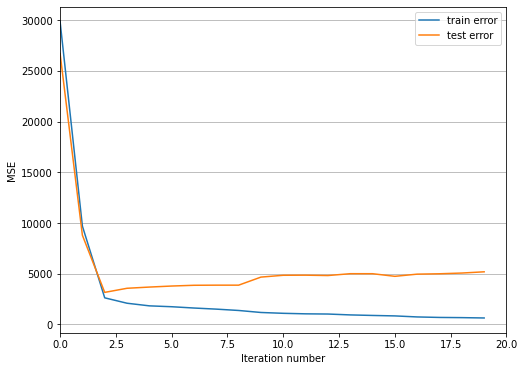

In [13]:
for id, result in enumerate(results_n_trees):
    print(f'Количество деревьев: {n_trees_list[id]}')
    get_error_plot(n_trees_list[id], result[1], result[2])

При увеличении количества деревьев на данной выборке происходит расхождение графиков ошибок на train и test
Соответственно происходит переобучение

#### Построим графики зависимости ошибок на train и test от глубины дерева (на 10 деревьях) ####

Максимальная глубина дерева: 3


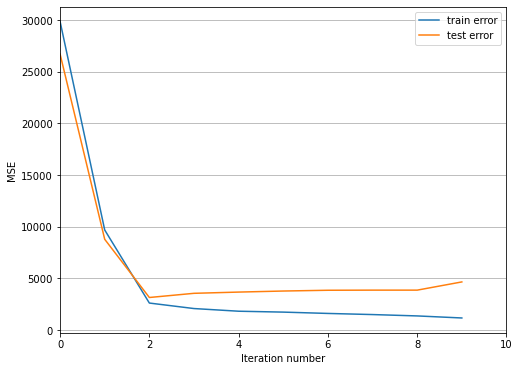

Максимальная глубина дерева: 5


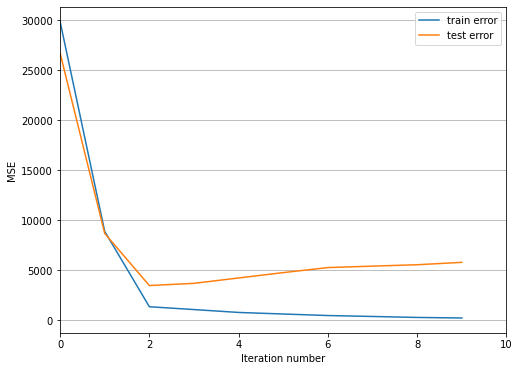

Максимальная глубина дерева: 10


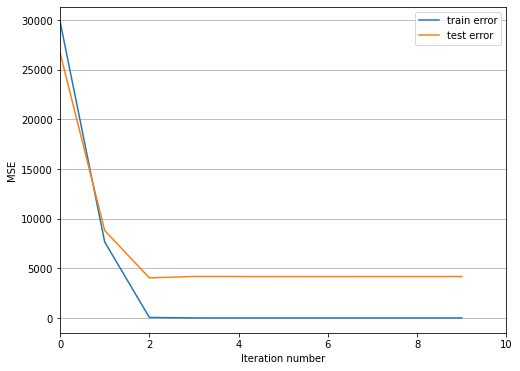

Максимальная глубина дерева: 20


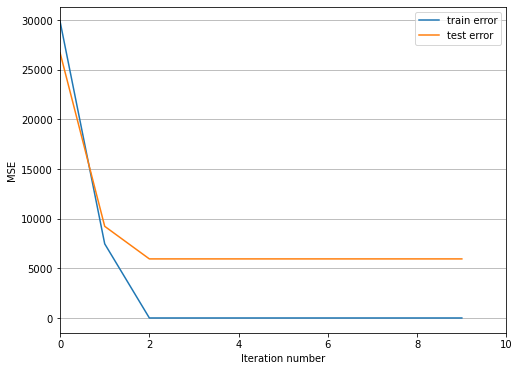

In [14]:
for id, result in enumerate(results_max_depth):
    print(f'Максимальная глубина дерева: {max_depth_list[id]}')
    get_error_plot(10, result[1], result[2])

При увеличении параметра максимальной глубины наблюдается "выпрямление" графика тестовой выборки. Ошибка на train становится равной нулю, что говорит о переобучении модели для исходного набора данных.

# Задание 2

Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

### Решение

In [162]:
def gb_stohastic_fit(n_trees, max_depth, X, y, coef, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей выборке на каждой итерации в список
    errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # Индексы случайной выборки (0.5 исходной) для каждого дерева
        train_idxs = np.random.randint(X.shape[0], size=int(X.shape[0]/2))

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X[train_idxs], y[train_idxs])
            errors.append(mean_squared_error(y[train_idxs], gb_predict(X[train_idxs], trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X[train_idxs], trees, coefs, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X[train_idxs], bias(y[train_idxs],target))
            errors.append(mean_squared_error(y[train_idxs], gb_predict(X[train_idxs], trees, coefs, eta)))

        trees.append(tree)
        
    return trees, errors


In [197]:
%%time
# Число деревьев в ансамбле
trees = 20

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.5

coef=[1]*trees

trees, errors = gb_stohastic_fit(trees, max_depth, X, y, coef, eta)


Wall time: 3.8 s


In [198]:
def get_error_plot(n_trees, train_err):
    plt.figure(figsize=(8, 6))
    plt.grid(axis='y')
    plt.xlabel('Trees number')
    plt.ylabel('MSE')
    trees_len = len(n_trees)
    plt.xlim(0, trees_len)
    plt.plot(range(0, trees_len), train_err, label='train error')
    plt.legend(loc='upper right')
    plt.show()

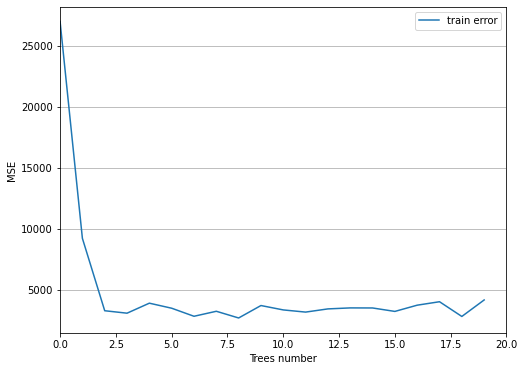

In [199]:
get_error_plot(trees, errors)

In [200]:
np.array(results_n_trees[3][1]) - np.array(errors)


array([ 2869.38736313,   482.25704928,  -650.17974195,  -981.6630078 ,
       -2060.50430322, -1733.19357715, -1201.07559177, -1720.17414279,
       -1302.19490245, -2520.67026026, -2242.95660559, -2116.13750718,
       -2398.36021391, -2565.86007259, -2613.73874797, -2376.48993483,
       -2989.7073851 , -3321.45465045, -2132.58640099, -3520.00573901])